In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:97% !important; }</style>"))

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import RobustScaler ,StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

from sklearn import preprocessing
import scoring as score # para hacer los reportes de puntajes
from time import time

import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)

import scoring as score # para hacer los reportes de puntajes

properati = pd.read_csv('datos/properati_final.csv')


<IPython.core.display.Javascript object>

# XGBoost

In [3]:
#paso features con strings a numericos
le_barrio = preprocessing.LabelEncoder()
barrios=properati['state_name']
le_barrio.fit(barrios)
properati['state_name'] = le_barrio.transform(barrios)

le_zona = preprocessing.LabelEncoder()
zona=properati['place_name']
le_zona.fit(zona)
properati['place_name'] = le_zona.transform(zona)

le_tipo = preprocessing.LabelEncoder()
tipos_prop=properati['property_type']
le_tipo.fit(tipos_prop)
properati['property_type'] = le_tipo.transform(tipos_prop)

In [6]:
#preparo set de datos
X = zip(properati['surface_total_in_m2'],\
        properati['surface_covered_in_m2'],properati["property_type"],properati['state_name'],properati['place_name'])
y = properati['price_aprox_usd']

In [7]:
%%notify

xgb= XGBRegressor(nthread=-1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

learning_rate=np.arange(0.3,0.9,0.2)

param_grid = {"learning_rate": learning_rate,'min_child_weight':[1,3,5,6],'gamma':[i/10.0 for i in range(3,6)],'subsample':[i/10.0 for i in range(6,11)]}

search = RandomizedSearchCV(xgb, param_distributions=param_grid ,cv=5,n_iter=20) #refit deja el estimador fiteado con los mejores hiperparametros
start = time()
search.fit(X_train, y_train)

print("GridSearchCV duro %.2f segundos para %d candidatos a hiper-parametros."
    % (time() - start, len(search.cv_results_['params'])))
print("")
score.report_single(search.cv_results_)

GridSearchCV duro 231.67 segundos para 20 candidatos a hiper-parametros.

Puesto: 1
Promedio training score: 0.853 (std: 0.016)
Promedio validation score: 0.565 (std: 0.076)
Promedio fit time: 1.712s
Hiper-parametros: {'subsample': 0.7, 'learning_rate': 0.70000000000000007, 'gamma': 0.5, 'min_child_weight': 1}

Puesto: 1
Promedio training score: 0.853 (std: 0.016)
Promedio validation score: 0.565 (std: 0.076)
Promedio fit time: 1.619s
Hiper-parametros: {'subsample': 0.7, 'learning_rate': 0.70000000000000007, 'gamma': 0.3, 'min_child_weight': 1}

Puesto: 3
Promedio training score: 0.864 (std: 0.016)
Promedio validation score: 0.547 (std: 0.109)
Promedio fit time: 1.678s
Hiper-parametros: {'subsample': 0.9, 'learning_rate': 0.70000000000000007, 'gamma': 0.4, 'min_child_weight': 1}

Puesto: 4
Promedio training score: 0.652 (std: 0.041)
Promedio validation score: 0.534 (std: 0.100)
Promedio fit time: 2.484s
Hiper-parametros: {'subsample': 0.7, 'learning_rate': 0.10000000000000001, 'gamma':

<IPython.core.display.Javascript object>

In [ ]:
%%notify

xgb= XGBRegressor(nthread=-1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

learning_rate=np.arange(0.3,0.9,0.2)

param_grid = {"learning_rate": learning_rate,'min_child_weight':[1,3],'gamma':[i/10.0 for i in range(1,9)],'subsample':[i/10.0 for i in range(6,8)]}

search = GridSearchCV(xgb, param_grid=param_grid ,cv=5) #refit deja el estimador fiteado con los mejores hiperparametros
start = time()
search.fit(X_train, y_train)

print("GridSearchCV duro %.2f segundos para %d candidatos a hiper-parametros."
    % (time() - start, len(search.cv_results_['params'])))
print("")
score.report_single(search.cv_results_)

In [8]:
mejor = search.best_estimator_

In [9]:
properati["xgb"] = mejor.predict(X)

In [10]:
X= zip(properati['surface_total_in_m2'],\
        properati['surface_covered_in_m2'],properati['property_type'],properati['state_name'],properati['place_name'],properati["xgb"])
y=properati['price_aprox_usd'] 

# RF

In [11]:
%%notify

rf = RandomForestRegressor(n_jobs=-1)

criterion = ['mse']
max_features =["auto","log2",None]
n_estimators = np.arange(10,200,10)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

param_grid = {"criterion": criterion,"max_features":max_features,"n_estimators":n_estimators}

search = RandomizedSearchCV(rf, param_distributions=param_grid ,cv=5,n_iter=50) #refit deja el estimador fiteado con los mejores hiperparametros
start = time()
search.fit(X_train, y_train)

print("GridSearchCV duro %.2f segundos para %d candidatos a hiper-parametros."
    % (time() - start, len(search.cv_results_['params'])))
print("")
score.report_single(search.cv_results_)

KeyboardInterrupt: 

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [12]:
%%notify

rf = RandomForestRegressor(n_jobs=-1)

criterion = ['mse']
max_features =["auto","log2"]
n_estimators = np.arange(60,70,5)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

param_grid = {"criterion": criterion,"max_features":max_features,"n_estimators":n_estimators}

search = GridSearchCV(rf, param_grid=param_grid ,cv=5)
start = time()
search.fit(X_train, y_train)

print("GridSearchCV duro %.2f segundos para %d candidatos a hiper-parametros."
    % (time() - start, len(search.cv_results_['params'])))
print("")
score.report_single(search.cv_results_)

GridSearchCV duro 90.50 segundos para 4 candidatos a hiper-parametros.

Puesto: 1
Promedio training score: 0.964 (std: 0.001)
Promedio validation score: 0.819 (std: 0.020)
Promedio fit time: 2.117s
Hiper-parametros: {'max_features': 'log2', 'n_estimators': 65, 'criterion': 'mse'}

Puesto: 2
Promedio training score: 0.964 (std: 0.001)
Promedio validation score: 0.818 (std: 0.021)
Promedio fit time: 2.100s
Hiper-parametros: {'max_features': 'log2', 'n_estimators': 60, 'criterion': 'mse'}

Puesto: 3
Promedio training score: 0.964 (std: 0.001)
Promedio validation score: 0.814 (std: 0.026)
Promedio fit time: 4.477s
Hiper-parametros: {'max_features': 'auto', 'n_estimators': 65, 'criterion': 'mse'}

Puesto: 4
Promedio training score: 0.964 (std: 0.001)
Promedio validation score: 0.814 (std: 0.025)
Promedio fit time: 4.396s
Hiper-parametros: {'max_features': 'auto', 'n_estimators': 60, 'criterion': 'mse'}



<IPython.core.display.Javascript object>

In [13]:
mejor_rf = search.best_estimator_
print mejor_rf.feature_importances_

[ 0.15770151  0.23789608  0.03021275  0.01713819  0.0484902   0.50856127]


In [14]:
search.score(X_test,y_test)

0.51719475942368454

In [15]:
errores = mejor_rf.predict(X_test)-y_test
print ("Error maximo:{0}\nError minimo:{1}".format( max(abs(errores)),min(abs(errores))))
print(errores)

Error maximo:43936923.0769
Error minimo:0.0
127600   -286333.333333
12941     -16285.640882
61746      79967.707692
17195     595015.384615
134802     11365.717077
22707      16698.420513
15884    -112341.538462
3814         997.435897
13150     -58188.644689
46201     -30957.874359
108707    -46206.728205
121276      5467.405861
108668    -19634.615385
51116      -4100.000000
125499      9084.615385
110830    -39417.182051
5294       46138.461538
54630     -94553.992674
114915     23630.866667
40757      16414.564103
133737     64643.608059
96399     496430.769231
24594      25941.688645
78949     -68898.974359
80875     -69664.615385
68007      46046.153846
39215       4079.180708
12033     -10369.230769
86576      17878.791209
118581    -48336.654212
              ...      
108670    119000.000000
91703    -235769.230769
115211    -14743.000000
22239      42015.384615
27014      14990.529527
2458       35721.251526
132907     -1867.692308
72921      10538.461538
64044      86376.589

In [16]:
count_max=0
max_error=1000
lista=[]
for error in errores:
    if abs(error)>=max_error:
        count_max+=1
        lista.append(abs(error))
print ("Hay {0} de {1} que tienen mas de {2} USD de error ({3}%)".format(count_max,len(errores),max_error,100 * count_max/len(errores)))

Hay 25943 de 27272 que tienen mas de 1000 USD de error (95%)


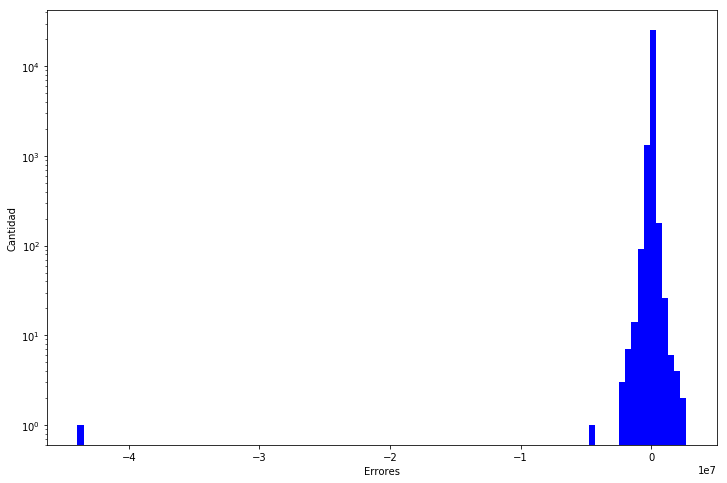

In [22]:
# the histogram of the data
plt.figure(figsize=(12,8))
plt.hist(errores, 100, facecolor='blue')
plt.xlabel('Errores')
plt.ylabel('Cantidad')
#plt.xlim(-10000000, 10000000) #para variar el "zoom a 0"
plt.yscale('log')
plt.show()